In [1]:
%pylab inline
import numpy as np #  convert list to array

import matplotlib.pyplot as plt
from ipywidgets import *  # az interaktivitásért felelős csomag

import tqdm 
import k3d

from scipy.optimize import fsolve
from scipy.optimize import fmin

from scipy.integrate import * # az integráló rutinok betöltése

Populating the interactive namespace from numpy and matplotlib


### The generating function for tea-cup type cusp caustics:  
$$\Phi(s,C_1,C_2) = \sqrt{1-s^2}+\sqrt{(\sqrt{1-s^2}-)^2+(s-C_2)^2},$$

where $s$ is the impact parameter of the incident light (here the radius of the circle is $R=1$, thus $s=[-1,1]$), 
and $C_1, C_2$ are the coordinates of the ray at its final point.


### The caustic parameteric equation:

\begin{eqnarray}
x_c &=& \left[1-\frac{1}{2}\,\cos(2 \alpha)\right] \cos\alpha, \\ 
y_c &=& \sin^3(\alpha)
\end{eqnarray}

Refs:

[1) Berry, M V, 1981, ‘Singularities in Waves’ in Les Houches Lecture Series Session XXXV, eds. R Balian, M Kléman and J-P Poirier, North-Holland: Amsterdam, 453-543. 
](https://michaelberryphysics.files.wordpress.com/2013/07/berry105.pdf)

[2) Berry, M V, & Upstill, C, 1980 Progress in Optics XVIII, 257-346, ‘Catastrophe optics: morphologies of caustics and their diffraction patterns’.](https://michaelberryphysics.files.wordpress.com/2013/07/berry089.pdf)


### Canonical form (expansion in $s$ up to 4th order and first order in $C_1$ and $C_2$): 

$$\Phi(s,C) \approx  (2 - C_1) -4 s\, C_1 C_2 + (2 C_1-1)\, s^2 + 2 C_2 (8 C_1 -3 )\, s^3 + (3/4 - 2 C_1)\, s^4  $$

## Cusp caustics

based on Refs:

[1) Berry, M V, 1981, ‘Singularities in Waves’ in Les Houches Lecture Series Session XXXV, eds. R Balian, M Kléman and J-P Poirier, North-Holland: Amsterdam, 453-543. 
](https://michaelberryphysics.files.wordpress.com/2013/07/berry105.pdf)

[2) Berry, M V, & Upstill, C, 1980 Progress in Optics XVIII, 257-346, ‘Catastrophe optics: morphologies of caustics and their diffraction patterns’.](https://michaelberryphysics.files.wordpress.com/2013/07/berry089.pdf)

see more:
[Berry and Klein, Colored diffraction catastrophes](https://michaelberryphysics.files.wordpress.com/2013/07/berry270.pdf)

### The generating function for cusp caustics:  
$$\Phi(s,C) = \frac{1}{4}\, s^4+\frac{1}{2}\, C_2 s^2+ C_1 s,$$
where genearlly $s=(s_1,s_2,\cdots)$ are the state variables specifying the ray for a given path (for cusp there is only one variable $s$, eg, the impact parameter for teacup caustics) and 

$C=(C_1,C_2,\cdots)$ are the control parameters, the coordinates of the "control space" in which the caustics 'live'.

The gradient map (Fermat principle): 

$$\frac{\partial \Phi}{\partial s_i} =0, \,\, \forall i.$$

The solutions are $s^\mu$, ie, the extrema (hilltops, minima, saddle) of $\Phi$. 

### The caustics are singularities of the gradient maps
The condition for $C$ to lie on a caustic is that the Hessian 

$$\left|\frac{\partial^2 \Phi}{\partial s_i \partial s_j}\right| =0$$ 
at points $s^\mu$. 

### For cusp cautics

$$\frac{\partial \Phi}{\partial s} = s^3 + C_2 s+ C_1 = 0$$

and the equation for the cusp caustics:

$$ C_1 = \pm {\left(\frac{-4 C_2^3}{27}\right)}^{1/2}. $$
Note that in Ref. [1] (above) in Eq. (3.23) probably there is a typo.

In [2]:
#def Lopt(s,C1,C2):
#    # generating function, optical length
#   
#    L=1/4*s**4+1/2*s**2*C2+s*C1
#    
#    return L

def Lopt(s,C1,C2):
    
    L=sqrt(1-s**2)+sqrt((sqrt(1-s**2)-C1)**2+(s-C2)**2)
    
    return L

def gyokok(C1,C2):
    # solution of the cubic equation x^3 + p x^2 +q = 0
    
    p,q=(C2,C1) ## corresponding to the gradient map s^3 + C_2 s+ C_1 = 0
    
    disk=4*p**3+27*q**2  #  discriminant
    
    if disk<0:  ##  3 real roots
        tmp=3*q/(2*p)*sqrt(-3/p)
        fi=arccos(tmp)/3
        kr=arange(0,3)
        xk=2*sqrt(-p/3)*cos(fi-2*pi/3*kr)
    else:
        if disk>0 and p<0:   ##  1 real root
            tmp=-3*abs(q)/(2*p)*sqrt(-3/p)
            fi=arccosh(tmp)/3
            xk=array([-2*abs(q)/q*sqrt(-p/3)*cosh(fi)])
        else:   ##  1 real root
            tmp=3*q/(2*p)*sqrt(3/p)
            fi=arcsinh(tmp)/3
            xk=array([-2*sqrt(p/3)*sinh(fi)])
            
    return xk

gyokok2=vectorize(gyokok)

def caustic_curve(szog):
    
    xc = (2-cos(2*szog))*cos(szog)/2
    yc = (sin(szog))**3
    return(xc,yc)


def caustic_curve_approx(C1):
    
    yc=sqrt(4/27*C1**3)
    xc = C1
    return(xc,yc)

def der_Lopt(s,C1,C2):
  
    der=(-s + (s*C1 - sqrt(1 - s**2)*C2)/
         sqrt((sqrt(1-s**2)-C1)**2+(s-C2)**2))/sqrt(1 - s**2)
    
    return der


In [3]:
gyokok(4,1), gyokok(4,-7)

(array([-1.3787967]), array([ 2.29240159,  0.60270493, -2.89510652]))

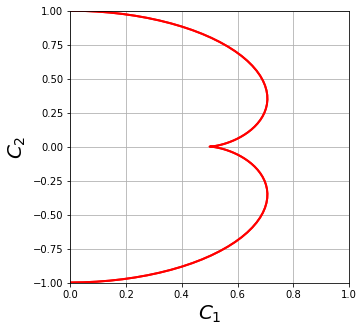

In [4]:
fig = figure(figsize=(5,5))
subplot(111)

szog=linspace(-90,90,100)
szog=szog*pi/180

xc,yc=caustic_curve(szog)
plot(xc,yc, 'r-', lw=2)
plot(xc,-yc, 'r-', lw=2)

#ax.plot(-sqrt(-4/27*C1**3),C1, 'r-', lw=2)
#ax.plot(sqrt(-4/27*C1**3),C1, 'r-', lw=2)

xlabel(r'$C_1$',fontsize=20)
ylabel(r'$C_2$',fontsize=20);

xlim(0,1)
ylim(-1,1)
grid();

In [5]:
C1a,C2a=(-8,4)
print("Discriminant = ", 4*C1a**3+27*C2a)
Lopt(1,C1a,C2a),sqrt(C1a**2+(1-C2a)**2)

Discriminant =  -1940


(8.54400374531753, 8.54400374531753)

C1, C2 =  (0.7, 0.1)


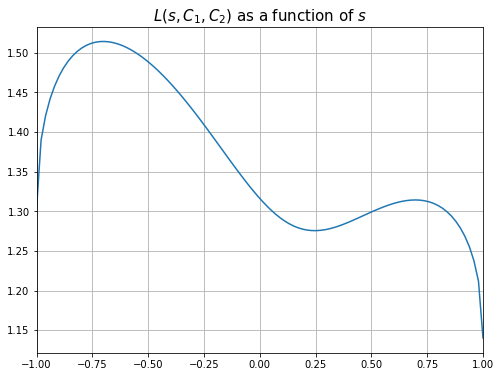

In [6]:
C1,C2=(0.7,0.1)

sm=1.0
s=linspace(-sm,sm,100)

fig = figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

plot(s,Lopt(s,C1,C2))
#plot(s,Lopt_approx(s,C1,C2))

title(r'$L(s,C_1,C_2)$ as a function of $s$', fontsize=15)

xm=gyokok(C1,C2)   #  harmadfoku polinom kozelites
#for x_ in xm:
#    axvline(x=x_,color='k',ls='--')

xlim(-1,1)
#ylim(0, 1)

grid();

print("C1, C2 = ",(C1,C2))
#print("gyokok =",xm)

In [7]:
C1,C2=(0.7,0.2)

s_initial_guess = [-0.7,0.2,0.7]
s_initial_guess = [-0.9,0.5,0.7]
s_extremum=[]
for s_tmp in s_initial_guess: 
    s_extremum.append(fsolve(der_Lopt, s_tmp,args=(C1,C2))[0])

print('s extremum = ',s_extremum)
[Lopt(s_,C1,C2) for s_ in range(len(s_extremum))]

s extremum =  [-0.7025250312072858, 0.4732688207263421, 0.6889805995825387]


/home/cserti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


[1.360555127546399, 1.063014581273465, nan]

In [8]:
def rajz(C1,C2):
    
    #C1,C2=(-5,1)

    sm=1.0
    s=linspace(-sm,sm,100)

    fig = figure(figsize=(12,6))
############################################
    ax1 = fig.add_subplot(121)
    
    
    t = linspace(-pi/2,pi/2,200)
    xc,yc=caustic_curve(t)
    plot(xc,yc, 'r-', lw=2)

    plot(cos(t), sin(t), color='k', linewidth=2.0) 

# Use the numerical solver to find the roots

    s_initial_guess = [-0.7,0.2,0.7]
#    s_initial_guess = [-0.9,0.5,0.9]
    s_extremum=[]
    for s_tmp in s_initial_guess: 
        s_extremum.append(fsolve(der_Lopt, s_tmp,args=(C1,C2))[0])

#  plotting rays

    #fifi= s_extremum[0]
    #s_extremum=[fifi,fifi,fifi]
    
    for s_ext in s_extremum:
        rayx=array([0,sqrt(1-s_ext**2),C1])
        rayy=array([s_ext,s_ext,C2])
        plot(rayx,rayy,'b-')
      
    plot(C1,C2,'o',markersize=10,color='k')

#########  kitakaras 
# kitakart resz szurkevel van betoltve

    x = linspace(0,1,200)
    y1 = -sqrt(1 -x**2)
    y2 = sqrt(1 -x**2)
    y3=[1]
    y4=[-1]

## zorder=2 ---> a nagyobb 'zorder'  abra van fent (top).
# Filling between line y2 and line y3
#fill_between(x, y1, y4, color='lightblue', alpha='0.5',zorder=2)
    fill_between(x, y2, y3, color='lightgrey',zorder=2)

# Filling between line y1 and line y4
#fill_between(x, y1, y4, color='lightyellow', alpha='0.5',zorder=2)
    fill_between(x, y1, y4, color='lightgray',zorder=2)

#########  kitakaras VEGE 

    xlim(0,1.)
    ylim(-1, 1)

    ax1.set_aspect(1)
#ax.set_aspect('equal')
#axes().set_aspect('equal')
#axis("equal")

    major_ticksx = arange(0, 1.01, 0.2)
    major_ticksy = arange(-1, 1.01, 0.25)
#minor_ticks = arange(-1, 1, 5)

    ax1.set_xticks(major_ticksx)
#ax1.set_xticks(minor_ticks, minor=True)
    ax1.set_yticks(major_ticksy)
#ax1.set_yticks(minor_ticks, minor=True)

    xlabel(r'$C_1$',fontsize=15)
    ylabel(r'$C_2$',fontsize=15,rotation=0)

    grid()

############################################

## approximate cusp curve: 

  
############################################
    ax2 = fig.add_subplot(122)

    s=linspace(-1,1,100)
    plot(s,Lopt(s,C1,C2))
    title(r'$L(s,C_1,C_2)$ as a function of $s$ for fixed $C_1,C_2$', fontsize=15)

    for x_ in s_extremum:
        axvline(x=x_,color='k',ls='--')

    xlabel(r'$s$',fontsize=15)
    ylabel(r'$L(s,C_1,C_2)$',fontsize=15)

    xlim(-1,1.)
    #ylim(-1, 1)

    grid();

#ax.set_aspect(1)

    tight_layout(pad=1)

    print("C_1, C_2 =",(C1,C2))
    print("s extremum = ",s_extremum)


/home/cserti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in sqrt
/home/cserti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt
/home/cserti/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


C_1, C_2 = (0.55, 0.4)
s extremum =  [-0.6245146748781214, 0.2, 0.7]


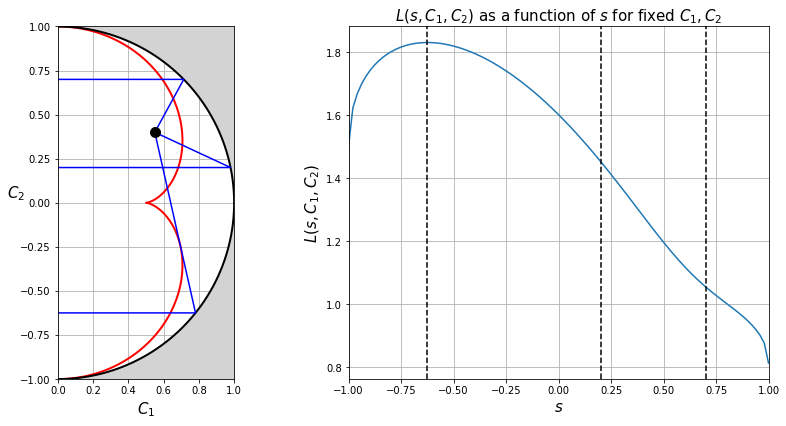

In [9]:
rajz(0.55,0.4)

In [10]:
interact(rajz,
               C1=FloatSlider(min=-1,max=1,step=0.01,value=0.8,description='C_1'),
               C2=FloatSlider(min=-1,max=1,step=0.01,value=0.25,description='C_2'),
               szin =Dropdown(options=['red','green','blue','darkcyan'],description='szín'));

interactive(children=(FloatSlider(value=0.8, description='C_1', max=1.0, min=-1.0, step=0.01), FloatSlider(val…

In [11]:
NK=25
kranx=linspace(-2,2,NK)
kranyz=linspace(-5,5,NK)
kx,ky,kz=meshgrid(kranx,kranyz,kranyz)

kx=kx.flatten()
ky=ky.flatten()
kz=kz.flatten()
ks=array([kx,ky,kz]).T

In [12]:
def f(k):
    x,y,z=k
    return x**3+y*x+z

In [13]:
DAT=[]
for k in tqdm.tqdm_notebook(ks):
#for k in ks:
    DAT.append(f(k))
DAT=array(DAT)
colors = (0xFF0000, 0x00FF00) * 10 * 10 * 10

In [14]:
kep=k3d.plot()
kep+=k3d.marching_cubes(DAT.reshape(NK,NK,NK).astype(float32),1,
                   bounds=[-5, 5, -5, 5, -5, 5],
                   color=0x0000ff,wireframe=True)
kep.display()

Output()